## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd() 

'D:\\Learnbay Datascience\\Projects_by_Sagar\\Project-2'

In [2]:
original_data = pd.read_csv("Project_4_Data.csv")
df1 = original_data.copy()

In [3]:
# to see all columns
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",50)

In [4]:
df1.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


- Warehouse_id: Product warehouse_id
- WH_Manager_ID: Employee ID of warehouse manager 
- Location_type: Location of warehouse-like in city or village
- WH_capacity_size: Storage capacity size of the warehouse
- Zone: Zone of the warehouse
- WH_regional_zone: Regional zone of the warehouse under each zone
- num_refill_req_l3m: Number of times refilling has been done in last 3 months
- transport_issue_l1y: Any transport issue like accident or goods stolen reported in last one
- Competitor_in_mkt: Number of instant noodles competitors in the market
- retail_shop_num: Number of the retail shop that sell the product under the warehouse area
- wh_owner_type: Company is owning the warehouse or they have got the  warehouse on rent
- distributor_num: The number of distributer works in between warehouse and retail shops. 
- flood_impacted: Warehouse is in the Flood impacted area indicator.
- Flood_proof: Warehouse is a flood-proof indicator.  Like storage is at some height not flood_proof  
- electric_supply: Warehouse have electric back up like generator, so they can run the warehouse in load shedding
- dist_from_hub: Distance between warehouse to the production hub in Kms
- workers_num: Number of workers working in the warehouse
- wh_est_year: Warehouse established year
- storage_issue_reported_l3m: Warehouse reported storage issue to corporate office in last 3 months. Like rat, fungus because of moisture etc.
- temp_reg_mach: Warehouse have temperature regulating machine indicator
- approved_wh_govt_certificate: What kind of standard certificate has been issued to the warehouse from government regulatory body
- wh_breakdown_l3m: Number of time warehouse face a breakdown in last 3 months. Like strike from worker, flood, or electrical failure
- govt_check_l3m: Number of time government Officers have been visited the warehouse to check the quality and expire of stored food in last 3 months
- product_wg_ton(Target_column): Product has been shipped in last 3 months. Weight is in tons

In [5]:
df1.shape

(25000, 24)

In [6]:
# Dropping Ware_house_ID & WH_Manager_ID
df = df1.iloc[:,2:]

In [7]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


## EDA

In [8]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [9]:
df.describe(include='O')

,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
count,25000,25000,25000,25000,25000,24092
unique,2,3,4,6,2,5
top,Rural,Large,North,Zone 6,Company Owned,C
freq,22957,10169,10278,8339,13578,5501


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [11]:
df.isnull().sum()

Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

<AxesSubplot: xlabel='workers_num', ylabel='Count'>

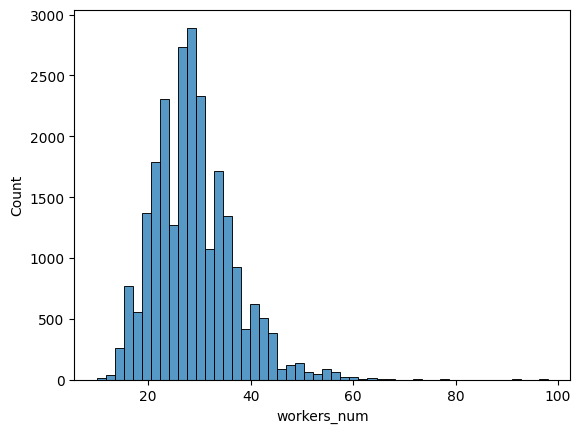

In [12]:
sns.histplot(df['workers_num'], bins=50)
# we will use median as it has outliers here to fill the missing values

In [13]:
df['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [14]:
df['wh_est_year'].value_counts()

2000.0    551
2006.0    541
2002.0    533
2014.0    531
2007.0    528
2001.0    518
2004.0    515
2008.0    509
1998.0    507
2016.0    507
2019.0    507
2013.0    502
2015.0    502
2010.0    499
2018.0    498
2012.0    497
2020.0    496
2005.0    489
2017.0    488
2011.0    486
2021.0    485
2009.0    485
1999.0    482
2003.0    469
2022.0    332
1997.0    329
1996.0    191
2023.0    142
Name: wh_est_year, dtype: int64

<AxesSubplot: xlabel='count', ylabel='wh_est_year'>

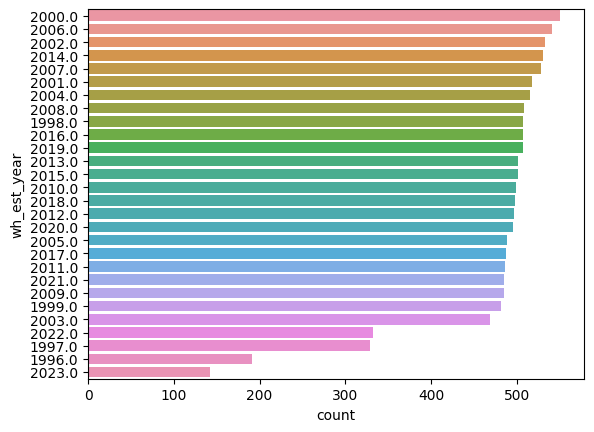

In [15]:
sns.countplot(data=df, y='wh_est_year', order=df['wh_est_year'].value_counts().index)

In [16]:
df['num_refill_req_l3m'].value_counts()

3    2990
8    2970
5    2941
0    2912
7    2873
1    2856
4    2846
6    2804
2    1808
Name: num_refill_req_l3m, dtype: int64

<AxesSubplot: >

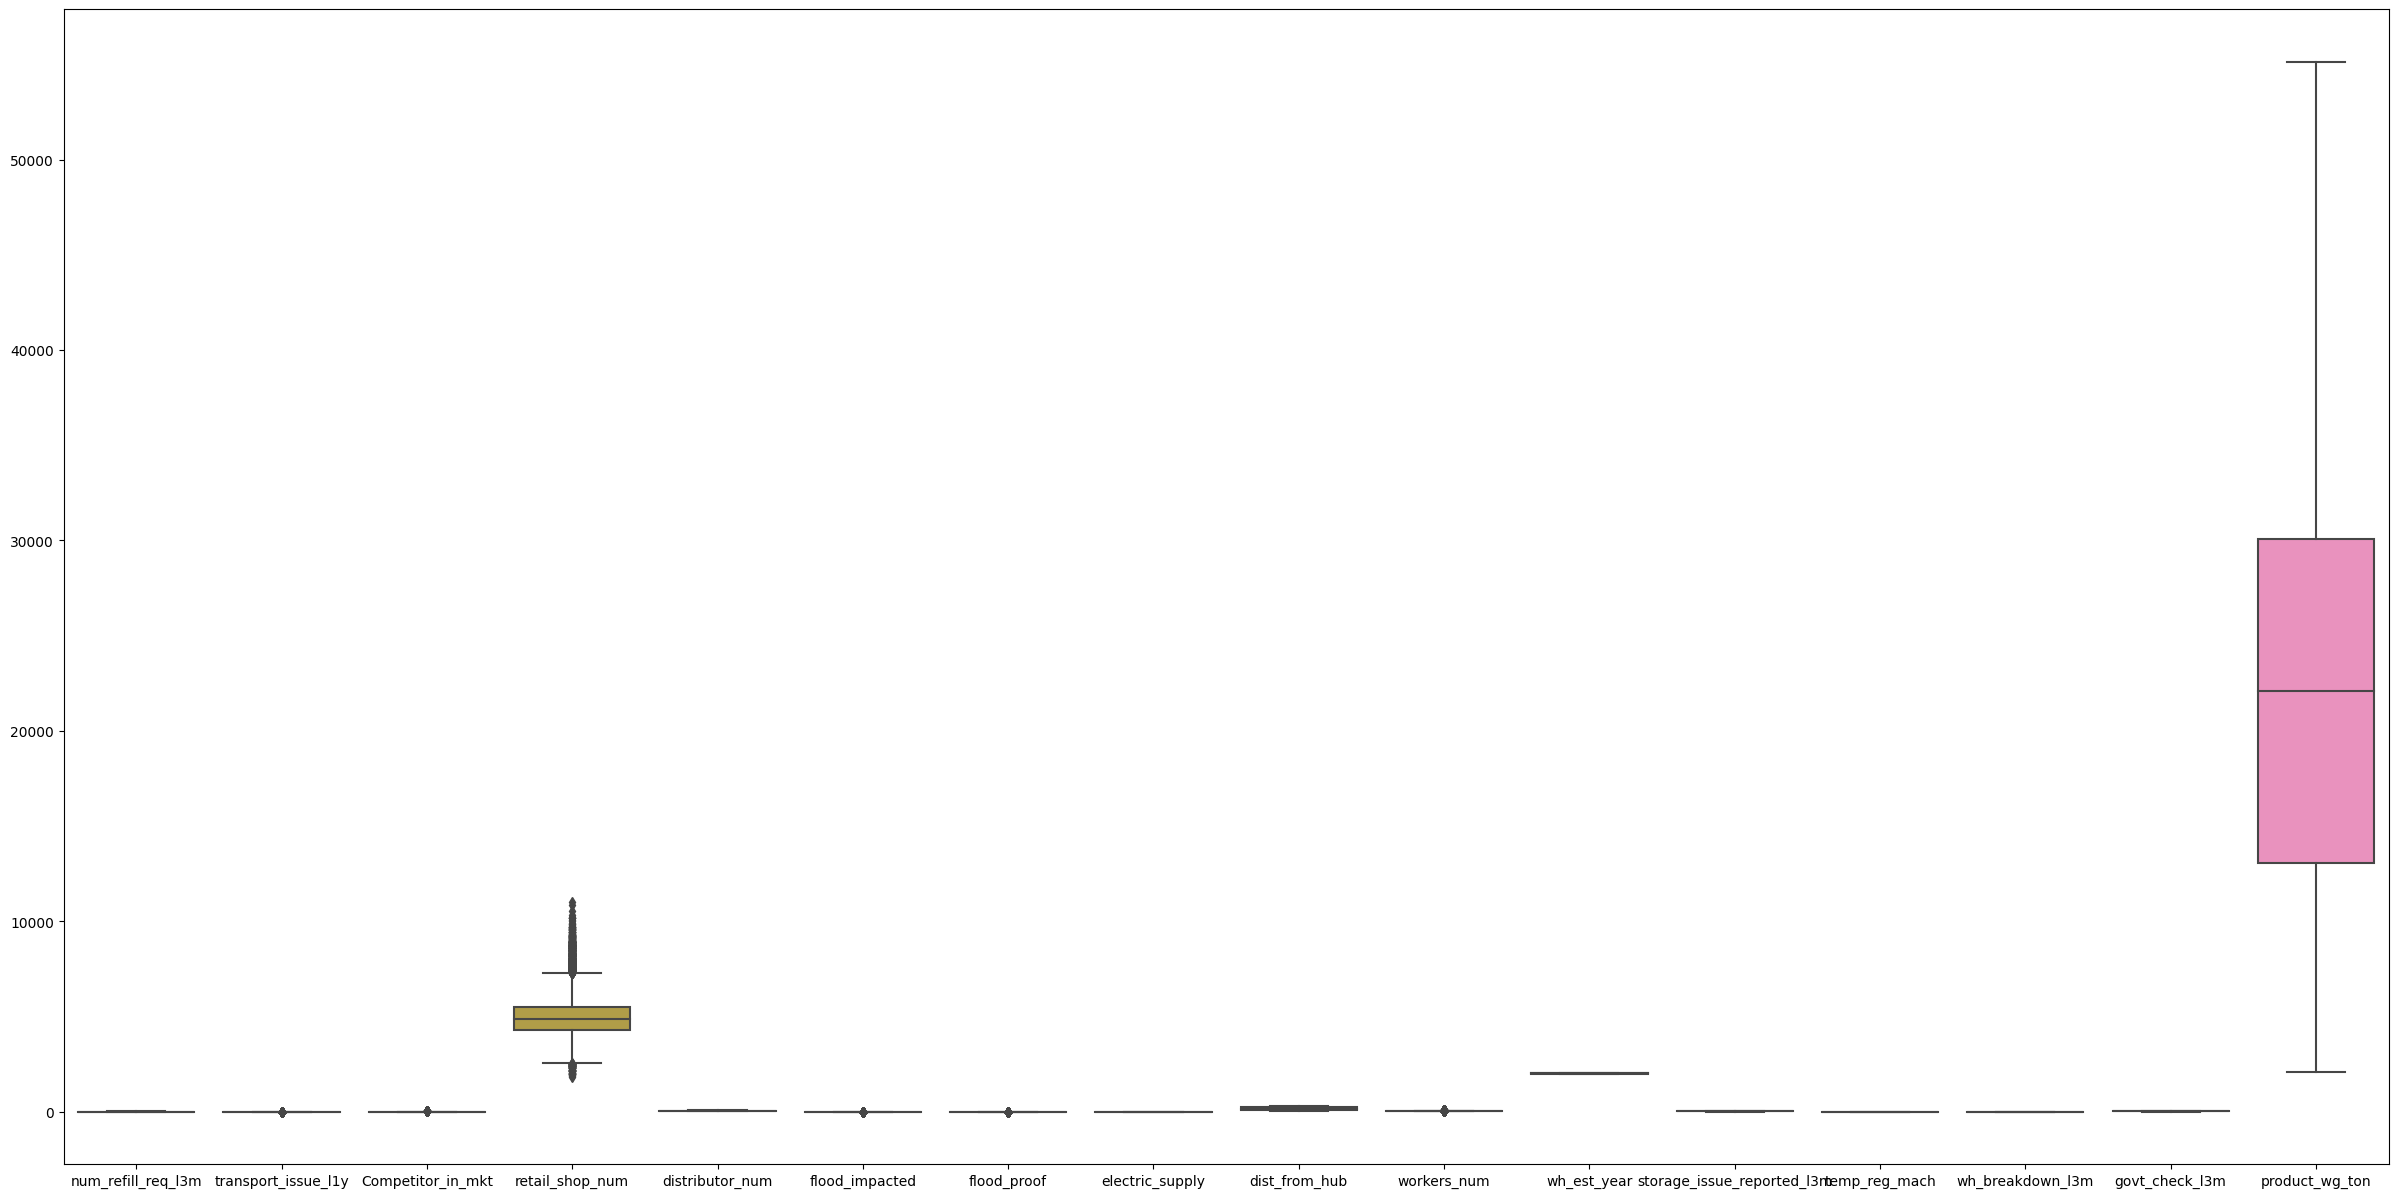

In [17]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df)

<AxesSubplot: >

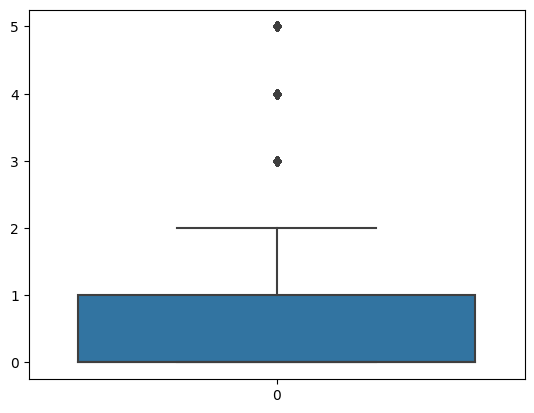

In [18]:
sns.boxplot(data=df['transport_issue_l1y'])

<AxesSubplot: >

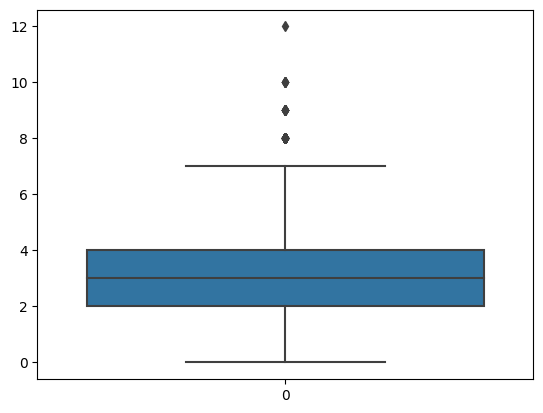

In [19]:
sns.boxplot(data=df['Competitor_in_mkt'])

<AxesSubplot: >

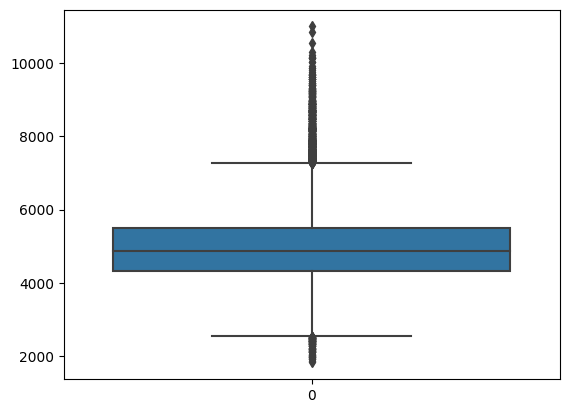

In [20]:
sns.boxplot(data=df['retail_shop_num'])

<AxesSubplot: >

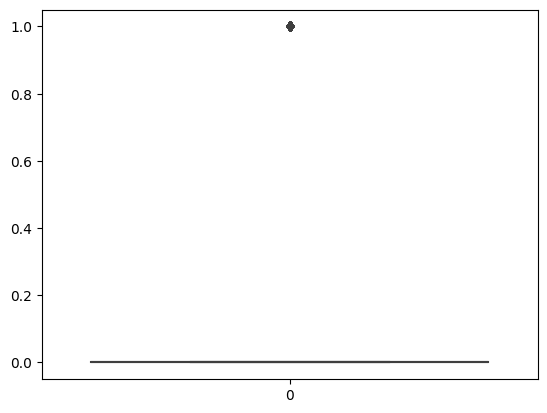

In [21]:
sns.boxplot(data=df['flood_impacted'])

<AxesSubplot: >

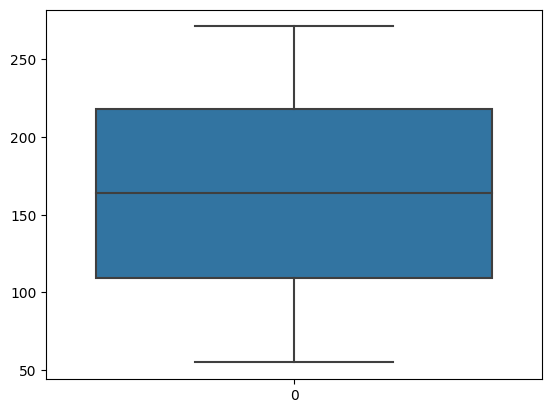

In [22]:
sns.boxplot(data=df['dist_from_hub'])

<AxesSubplot: >

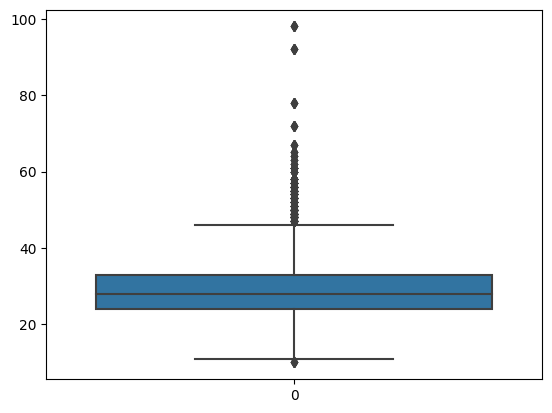

In [23]:
sns.boxplot(data=df['workers_num'])

In [24]:
df.kurt()

num_refill_req_l3m            -1.220697
transport_issue_l1y            1.838439
Competitor_in_mkt              1.786368
retail_shop_num                1.851946
distributor_num               -1.187564
flood_impacted                 5.297593
flood_proof                   13.362321
electric_supply               -1.563292
dist_from_hub                 -1.200682
workers_num                    3.409335
wh_est_year                   -1.175888
storage_issue_reported_l3m    -0.680142
temp_reg_mach                 -1.267434
wh_breakdown_l3m              -0.952149
govt_check_l3m                -1.057342
product_wg_ton                -0.502022
dtype: float64

<AxesSubplot: >

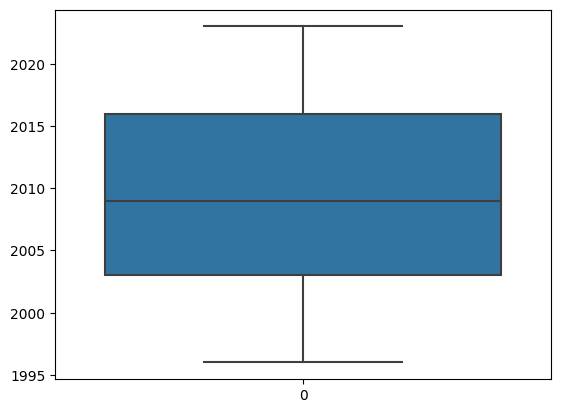

In [25]:
sns.boxplot(data=df['wh_est_year'])

In [26]:
df.skew()

num_refill_req_l3m           -0.075217
transport_issue_l1y           1.610907
Competitor_in_mkt             0.978456
retail_shop_num               0.908302
distributor_num               0.015213
flood_impacted                2.701327
flood_proof                   3.919343
electric_supply              -0.660933
dist_from_hub                -0.005999
workers_num                   1.059911
wh_est_year                   0.012417
storage_issue_reported_l3m    0.113345
temp_reg_mach                 0.855960
wh_breakdown_l3m             -0.068026
govt_check_l3m               -0.363262
product_wg_ton                0.331631
dtype: float64

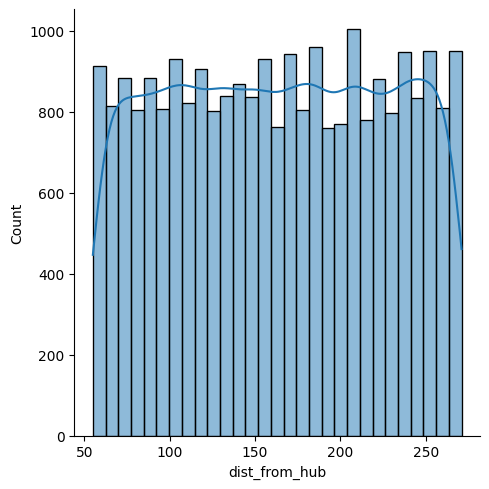

In [27]:
sns.displot(df['dist_from_hub'], kde=True)

In [28]:
#plt.figure(figsize=(40,30))
#sns.pairplot(df)

<AxesSubplot: xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

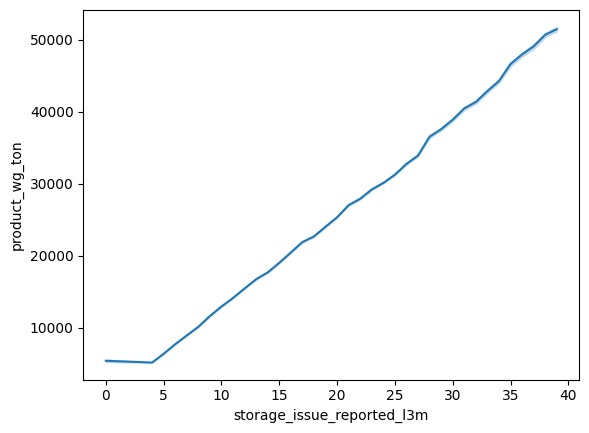

In [29]:
sns.lineplot(x=df['storage_issue_reported_l3m'], y=df['product_wg_ton'])

<AxesSubplot: xlabel='zone', ylabel='product_wg_ton'>

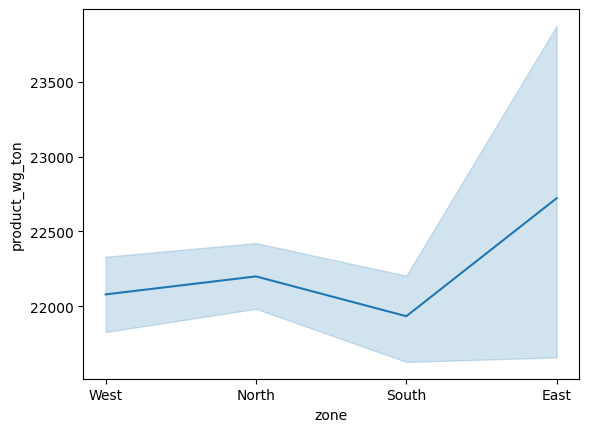

In [30]:
sns.lineplot(x=df['zone'], y=df['product_wg_ton'])

<AxesSubplot: xlabel='zone', ylabel='num_refill_req_l3m'>

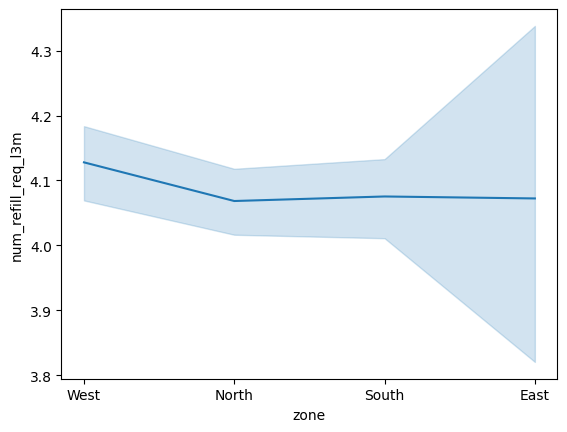

In [31]:
sns.lineplot(x=df['zone'], y=df['num_refill_req_l3m'])

<AxesSubplot: xlabel='WH_regional_zone', ylabel='product_wg_ton'>

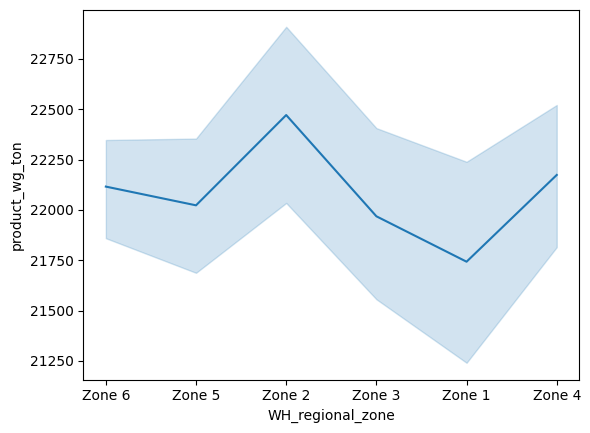

In [32]:
sns.lineplot(x=df['WH_regional_zone'], y=df['product_wg_ton'])

<AxesSubplot: xlabel='WH_regional_zone', ylabel='num_refill_req_l3m'>

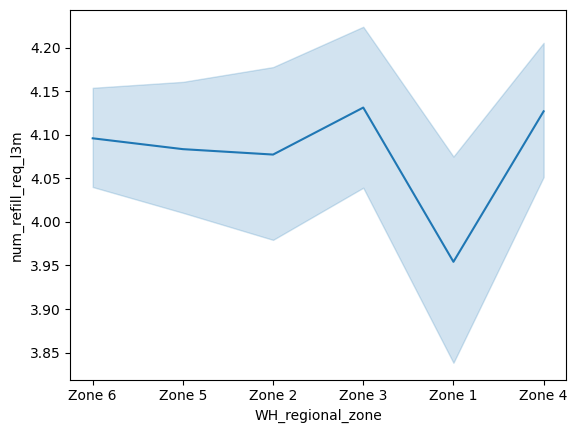

In [33]:
sns.lineplot(x=df['WH_regional_zone'], y=df['num_refill_req_l3m'])

<AxesSubplot: xlabel='zone', ylabel='retail_shop_num'>

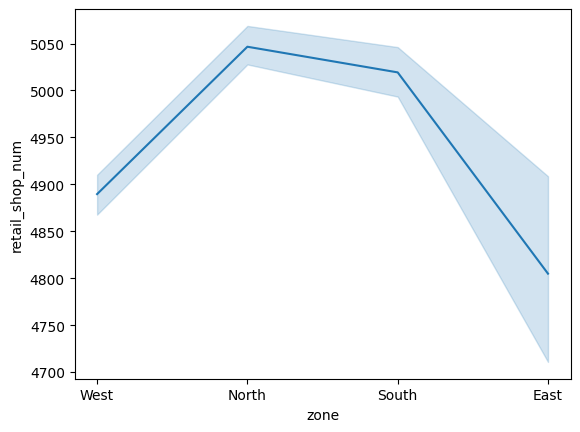

In [34]:
sns.lineplot(x=df['zone'], y=df['retail_shop_num'])

<AxesSubplot: xlabel='WH_regional_zone', ylabel='retail_shop_num'>

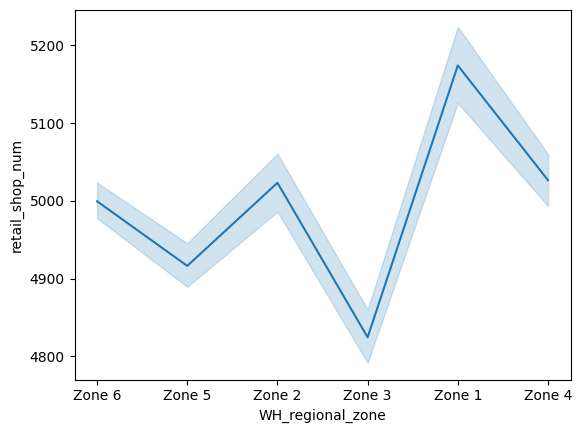

In [35]:
sns.lineplot(x=df['WH_regional_zone'], y=df['retail_shop_num'])

<AxesSubplot: xlabel='WH_capacity_size', ylabel='product_wg_ton'>

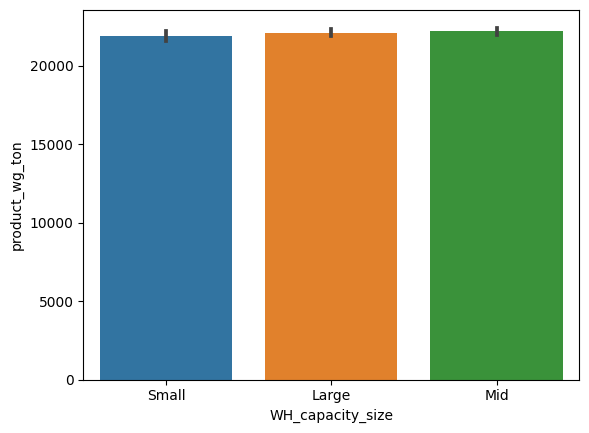

In [36]:
sns.barplot(x=df['WH_capacity_size'], y=df['product_wg_ton'])

In [37]:
sns.(x=df['dist_from_hub'], y=df['product_wg_ton'])

SyntaxError: invalid syntax (3058004451.py, line 1)

In [ ]:
df['dist_from_hub'].nunique()

In [ ]:
# col 11 wh_owner_type to be dropped
# col 16 dist from hub can be important

<AxesSubplot: xlabel='transport_issue_l1y', ylabel='product_wg_ton'>

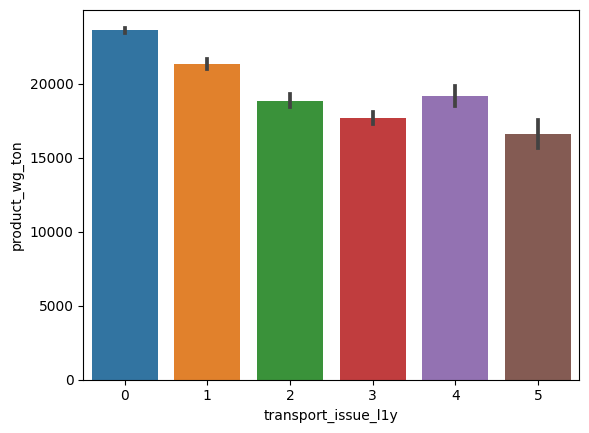

In [39]:
sns.barplot(x=df.transport_issue_l1y, y=df.product_wg_ton)

<AxesSubplot: xlabel='zone', ylabel='transport_issue_l1y'>

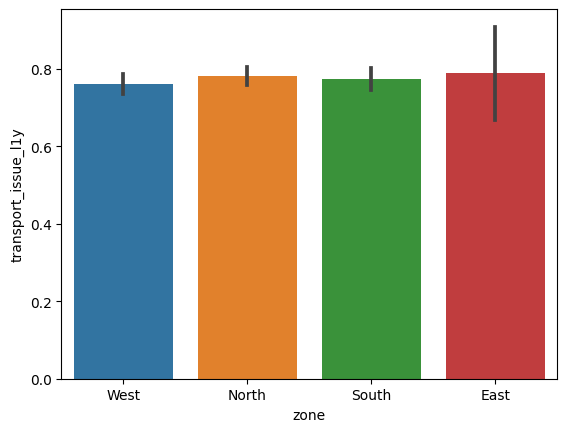

In [67]:
sns.barplot(x=df.zone, y=df.transport_issue_l1y)

More transport issues lead to less product supply to the warehouses. East zone has more transport issues affecting the supply.

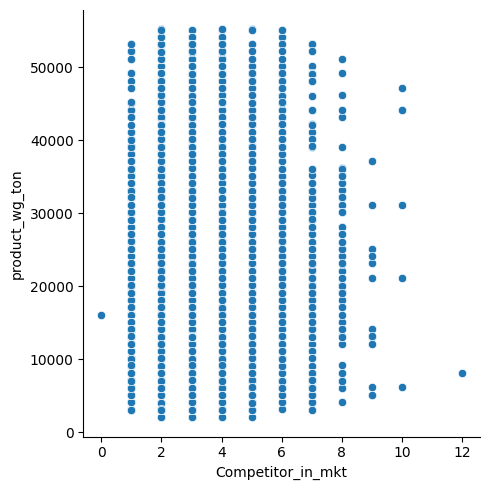

In [42]:
sns.relplot(x=df.Competitor_in_mkt, y=df.product_wg_ton)

<AxesSubplot: xlabel='zone', ylabel='Competitor_in_mkt'>

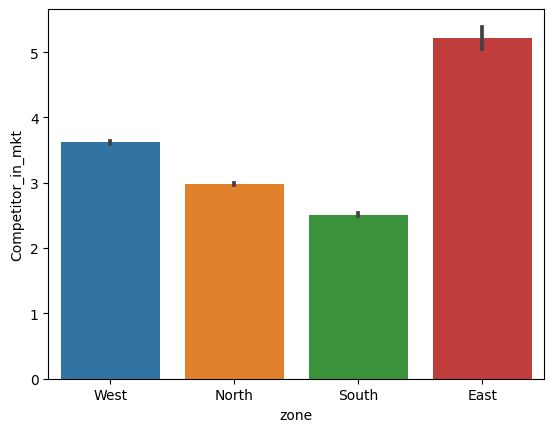

In [59]:
sns.barplot(x=df.zone, y=df.Competitor_in_mkt)

We can see if there are more comptetitors in the market there is less supply of the product. East zone has more competitors thats why less product supply.

In [107]:
df['zone'].value_counts()

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

<AxesSubplot: xlabel='zone', ylabel='count'>

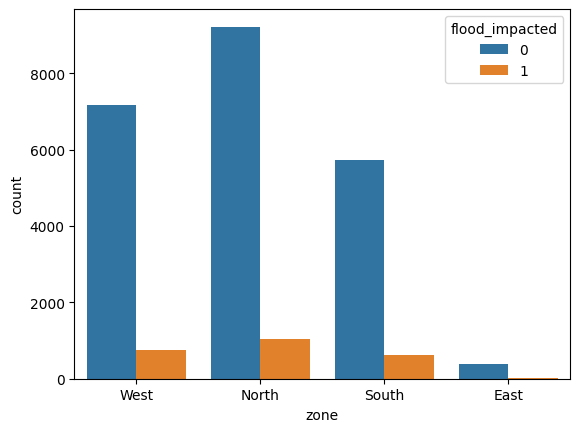

In [125]:
sns.countplot(x=df.zone, hue=df.flood_impacted)

<AxesSubplot: xlabel='zone', ylabel='count'>

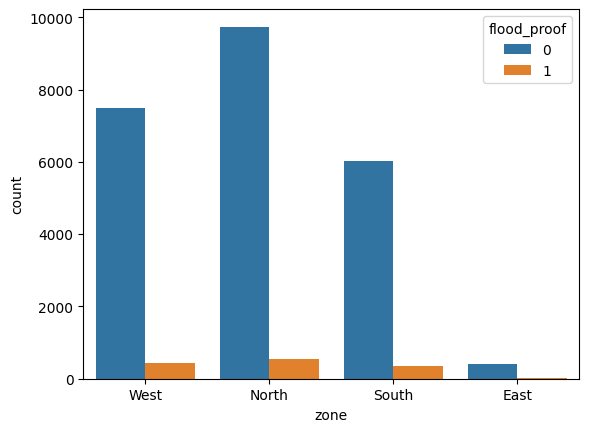

In [92]:
sns.countplot(x=df.zone, hue=df.flood_proof)

<AxesSubplot: xlabel='zone', ylabel='count'>

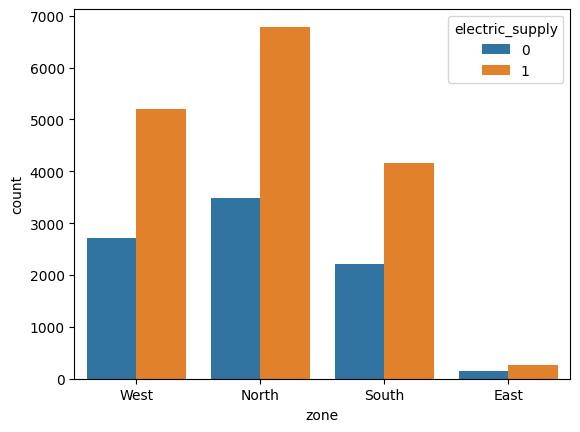

In [93]:
sns.countplot(x=df.zone, hue=df.electric_supply)

<AxesSubplot: xlabel='zone', ylabel='count'>

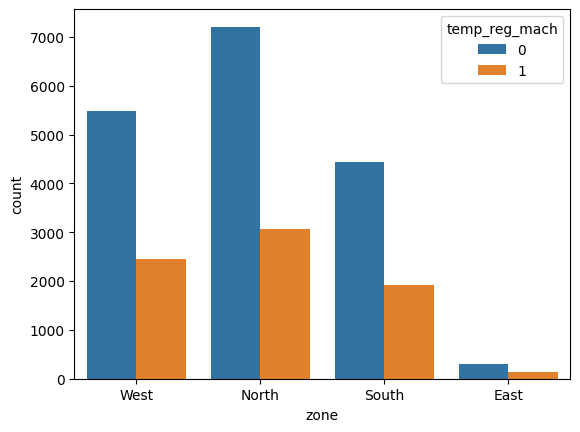

In [94]:
sns.countplot(x=df.zone, hue=df.temp_reg_mach)

<AxesSubplot: xlabel='zone', ylabel='product_wg_ton'>

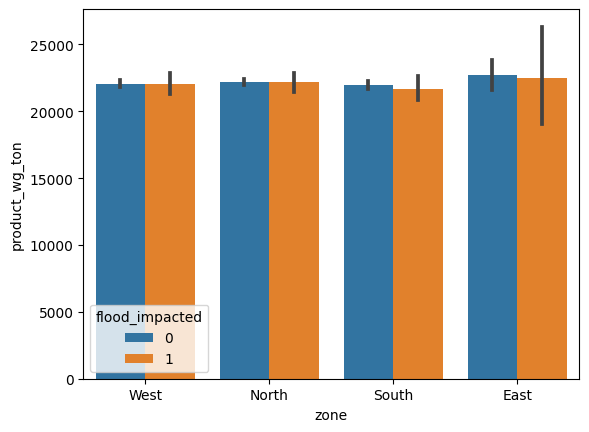

In [110]:
sns.barplot(x=df.zone, y=df.product_wg_ton, hue=df.flood_impacted)

<AxesSubplot: xlabel='zone', ylabel='product_wg_ton'>

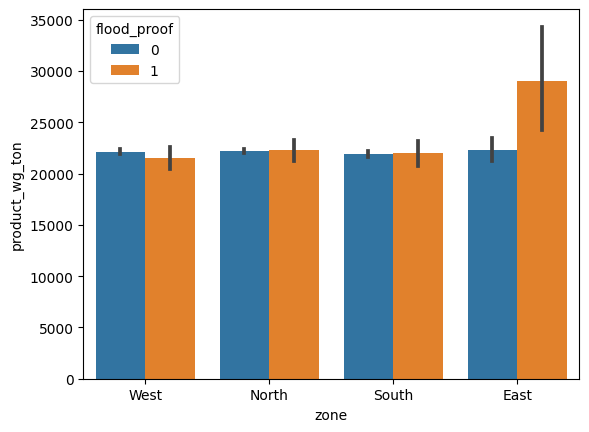

In [109]:
sns.barplot(x=df.zone, y=df.product_wg_ton, hue=df.flood_proof)

<AxesSubplot: xlabel='zone', ylabel='product_wg_ton'>

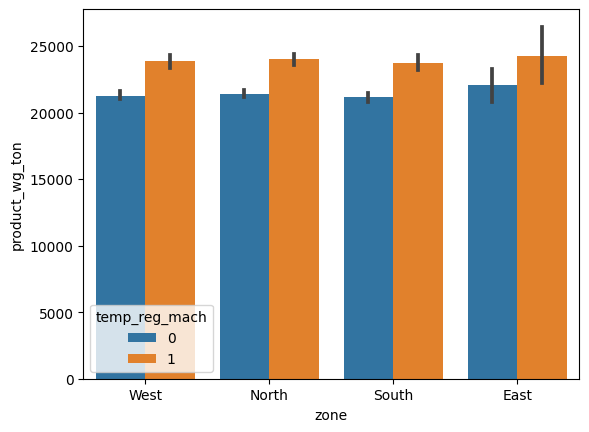

In [112]:
sns.barplot(x=df.zone, y=df.product_wg_ton, hue=df.temp_reg_mach)

<AxesSubplot: xlabel='WH_regional_zone', ylabel='count'>

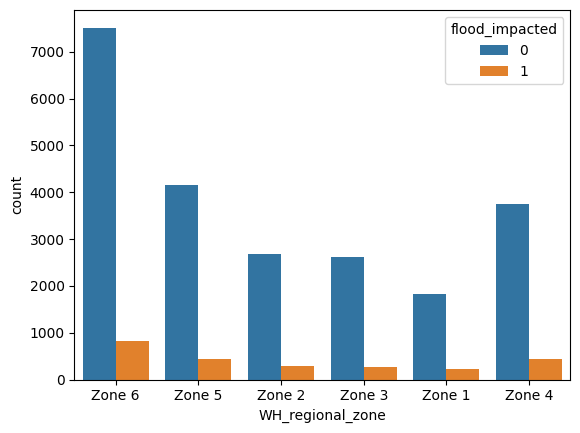

In [114]:
sns.countplot(x=df.WH_regional_zone, hue=df.flood_impacted)

<AxesSubplot: xlabel='WH_regional_zone', ylabel='count'>

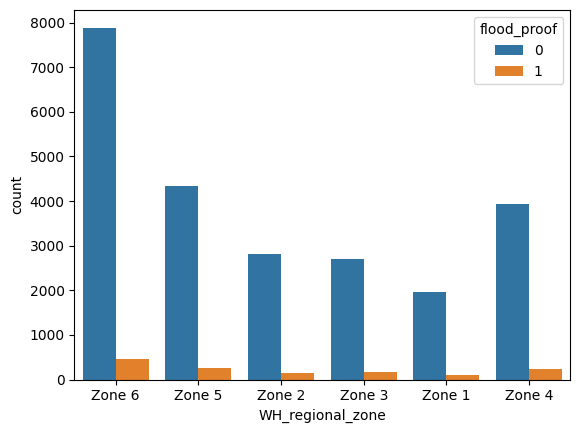

In [115]:
sns.countplot(x=df.WH_regional_zone, hue=df.flood_proof)

<AxesSubplot: xlabel='WH_regional_zone', ylabel='count'>

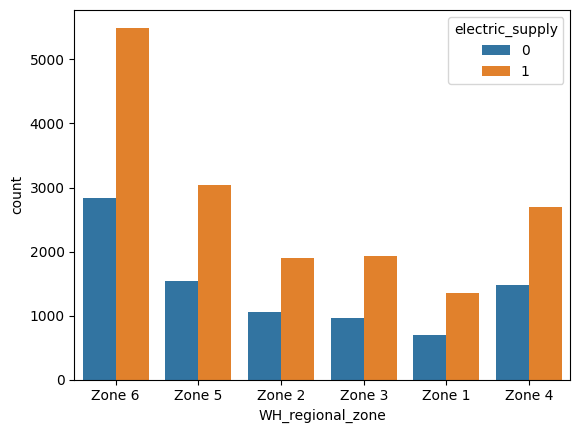

In [126]:
sns.countplot(x=df.WH_regional_zone, hue=df.electric_supply)

<AxesSubplot: xlabel='WH_regional_zone', ylabel='count'>

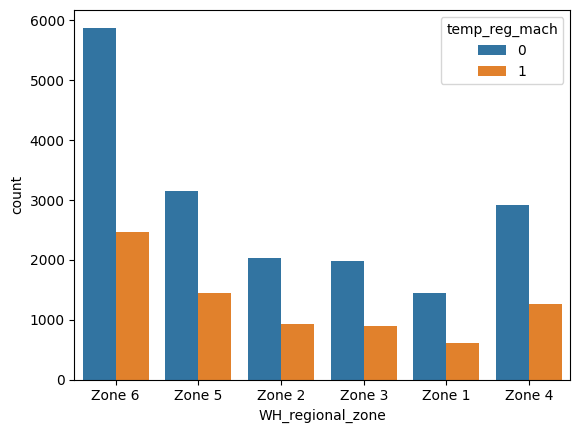

In [127]:
sns.countplot(x=df.WH_regional_zone, hue=df.temp_reg_mach)

<AxesSubplot: xlabel='zone', ylabel='count'>

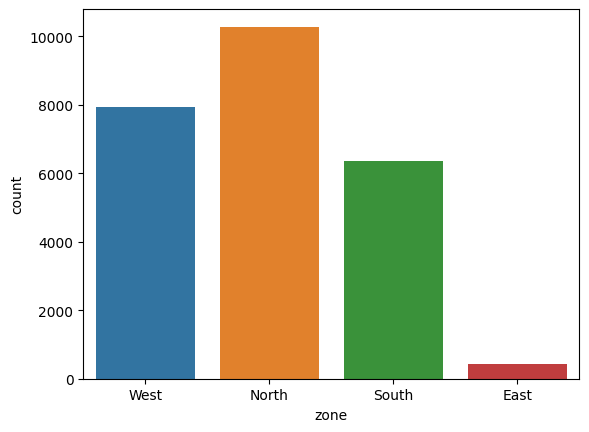

In [65]:
sns.countplot(x=df.zone)

<AxesSubplot: xlabel='WH_regional_zone', ylabel='count'>

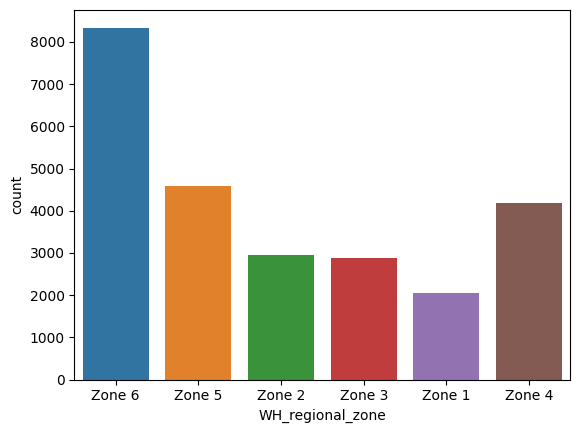

In [66]:
sns.countplot(x=df.WH_regional_zone)

<AxesSubplot: xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

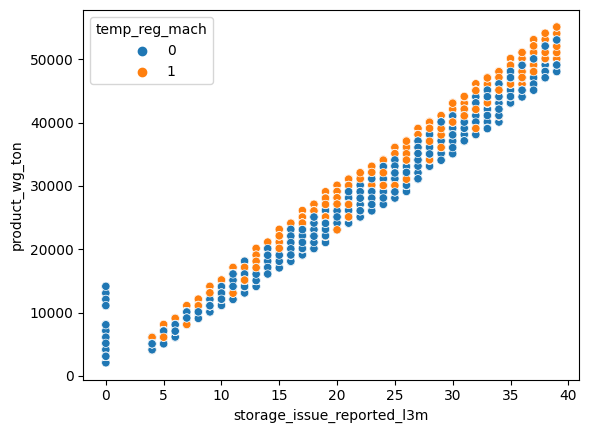

In [49]:
sns.scatterplot(x=df.storage_issue_reported_l3m, y=df.product_wg_ton, hue=df.temp_reg_mach)

<AxesSubplot: xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

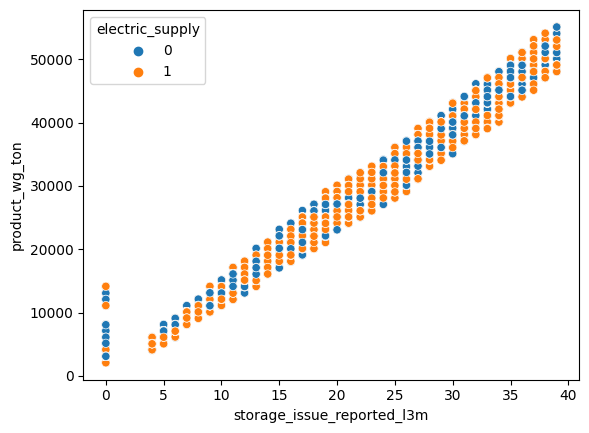

In [51]:
sns.scatterplot(x=df.storage_issue_reported_l3m, y=df.product_wg_ton, hue=df.electric_supply)

<AxesSubplot: xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

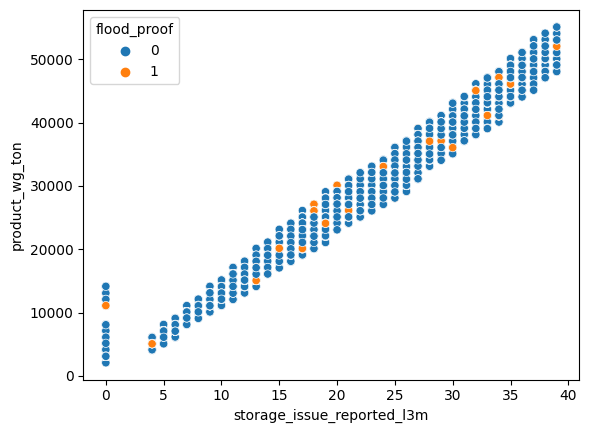

In [130]:
sns.scatterplot(x=df.storage_issue_reported_l3m, y=df.product_wg_ton, hue=df.flood_proof)

<AxesSubplot: xlabel='WH_regional_zone', ylabel='Competitor_in_mkt'>

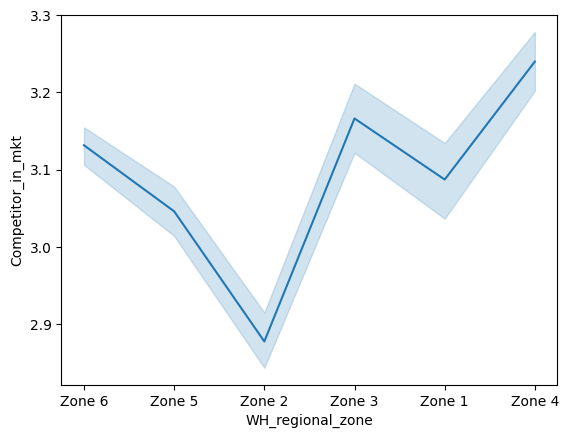

In [129]:
sns.lineplot(x=df.WH_regional_zone, y=df.Competitor_in_mkt)

<AxesSubplot: xlabel='WH_regional_zone', ylabel='product_wg_ton'>

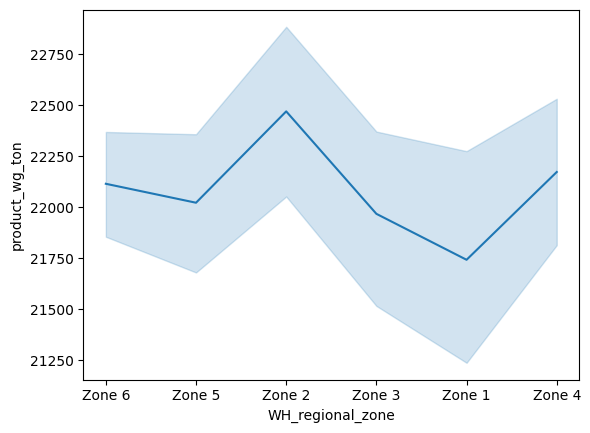

In [62]:
sns.lineplot(x=df.WH_regional_zone, y=df.product_wg_ton)